In [247]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from pandas import DataFrame,Series
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [248]:
df = DataFrame(pd.read_csv('FlightDelays.csv'))

In [249]:
df

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status
0,1455,OH,1455,JFK,184,01/01/2004,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,01/01/2004,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,01/01/2004,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,01/01/2004,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,01/01/2004,7792,IAD,0,4,1,N698BR,ontime
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,645,RU,644,EWR,199,1/31/2004,2761,DCA,0,6,31,N15555,ontime
2197,1700,RU,1653,EWR,213,1/31/2004,2497,IAD,0,6,31,N16976,ontime
2198,1600,RU,1558,EWR,199,1/31/2004,2361,DCA,0,6,31,N14902,ontime
2199,1359,RU,1403,EWR,199,1/31/2004,2216,DCA,0,6,31,N16961,ontime


We only need "Day of the week, dept. time, origin, dest., carrier, weather"

In [250]:
df = df.drop(["CRS_DEP_TIME","DISTANCE","FL_DATE","FL_NUM","DAY_OF_MONTH","TAIL_NUM"],1)

In [251]:
df

,CARRIER,DEP_TIME,DEST,ORIGIN,Weather,DAY_WEEK,Flight Status
0,OH,1455,JFK,BWI,0,4,ontime
1,DH,1640,JFK,DCA,0,4,ontime
2,DH,1245,LGA,IAD,0,4,ontime
3,DH,1709,LGA,IAD,0,4,ontime
4,DH,1035,LGA,IAD,0,4,ontime
...,...,...,...,...,...,...,...
2196,RU,644,EWR,DCA,0,6,ontime
2197,RU,1653,EWR,IAD,0,6,ontime
2198,RU,1558,EWR,DCA,0,6,ontime
2199,RU,1403,EWR,DCA,0,6,ontime


In [252]:
df.describe()

,DEP_TIME,Weather,DAY_WEEK
count,2201.000000,2201.000000,2201.000000
mean,1369.298955,0.014539,3.905498
std,442.462754,0.119725,1.903149
min,10.000000,0.000000,1.000000
25%,1004.000000,0.000000,2.000000
50%,1450.000000,0.000000,4.000000
75%,1709.000000,0.000000,5.000000
max,2330.000000,1.000000,7.000000


## Exploratory Data Analysis

In [253]:
df["Flight Status"].unique()

array(['ontime', 'delayed'], dtype=object)

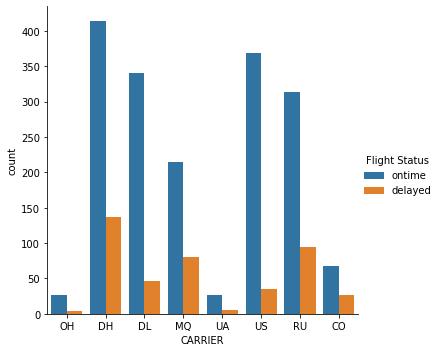

In [254]:
sns.catplot("CARRIER",data = df,hue="Flight Status",kind="count")

**US(USAirways) -> min % of delays<br>
 CO(Continental) -> max % of delays**

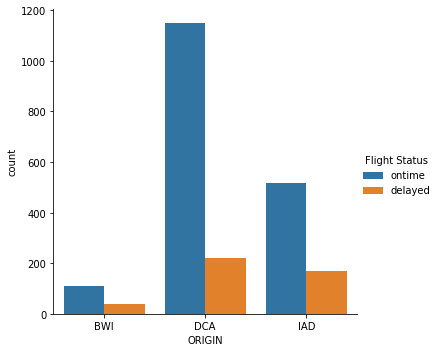

In [255]:
sns.catplot("ORIGIN",data = df,hue="Flight Status",kind="count")

**Flights originating from DCA(Reagan National) have min. chances of getting delayed.**

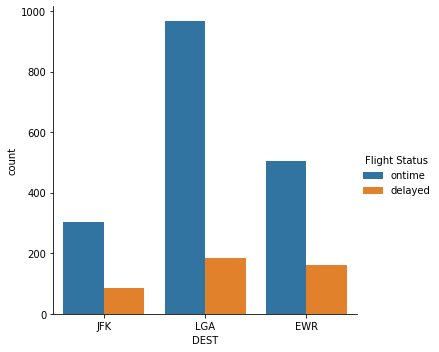

In [256]:
sns.catplot("DEST",data = df,hue="Flight Status",kind="count")

**Flights destined for LGA(LaGuardia) have min. chances of getting delayed.**

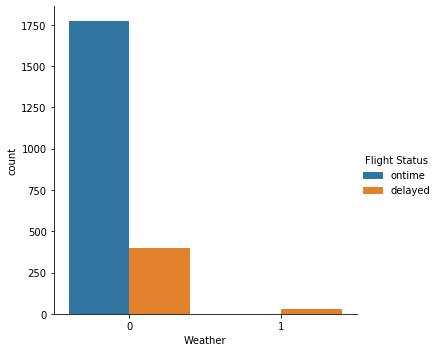

In [257]:
sns.catplot("Weather",data = df,hue="Flight Status",kind="count")

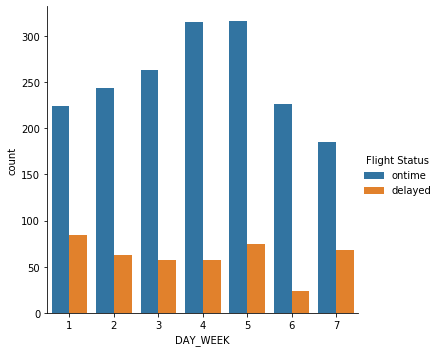

In [258]:
sns.catplot("DAY_WEEK",data = df,hue="Flight Status",kind="count")

**All days have similar chances of getting delays except for Saturday which apparently has min chances**

## Data Pre-processing

In [259]:
dummy_var = pd.get_dummies(df.DAY_WEEK)
dummy_var

,1,2,3,4,5,6,7
0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...
2196,0,0,0,0,0,1,0
2197,0,0,0,0,0,1,0
2198,0,0,0,0,0,1,0
2199,0,0,0,0,0,1,0


In [260]:
dummy_var.columns = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"] 

In [261]:
dummy_var

,Mon,Tue,Wed,Thu,Fri,Sat,Sun
0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...
2196,0,0,0,0,0,1,0
2197,0,0,0,0,0,1,0
2198,0,0,0,0,0,1,0
2199,0,0,0,0,0,1,0


In [262]:
df = pd.concat([df,dummy_var],1) 

In [263]:
df

,CARRIER,DEP_TIME,DEST,ORIGIN,Weather,DAY_WEEK,Flight Status,Mon,Tue,Wed,Thu,Fri,Sat,Sun
0,OH,1455,JFK,BWI,0,4,ontime,0,0,0,1,0,0,0
1,DH,1640,JFK,DCA,0,4,ontime,0,0,0,1,0,0,0
2,DH,1245,LGA,IAD,0,4,ontime,0,0,0,1,0,0,0
3,DH,1709,LGA,IAD,0,4,ontime,0,0,0,1,0,0,0
4,DH,1035,LGA,IAD,0,4,ontime,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,RU,644,EWR,DCA,0,6,ontime,0,0,0,0,0,1,0
2197,RU,1653,EWR,IAD,0,6,ontime,0,0,0,0,0,1,0
2198,RU,1558,EWR,DCA,0,6,ontime,0,0,0,0,0,1,0
2199,RU,1403,EWR,DCA,0,6,ontime,0,0,0,0,0,1,0


In [264]:
df = df.drop(['DAY_WEEK'],axis=1)
df

,CARRIER,DEP_TIME,DEST,ORIGIN,Weather,Flight Status,Mon,Tue,Wed,Thu,Fri,Sat,Sun
0,OH,1455,JFK,BWI,0,ontime,0,0,0,1,0,0,0
1,DH,1640,JFK,DCA,0,ontime,0,0,0,1,0,0,0
2,DH,1245,LGA,IAD,0,ontime,0,0,0,1,0,0,0
3,DH,1709,LGA,IAD,0,ontime,0,0,0,1,0,0,0
4,DH,1035,LGA,IAD,0,ontime,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,RU,644,EWR,DCA,0,ontime,0,0,0,0,0,1,0
2197,RU,1653,EWR,IAD,0,ontime,0,0,0,0,0,1,0
2198,RU,1558,EWR,DCA,0,ontime,0,0,0,0,0,1,0
2199,RU,1403,EWR,DCA,0,ontime,0,0,0,0,0,1,0


In [265]:
nan = df.isnull()
nan.describe()

,CARRIER,DEP_TIME,DEST,ORIGIN,Weather,Flight Status,Mon,Tue,Wed,Thu,Fri,Sat,Sun
count,2201,2201,2201,2201,2201,2201,2201,2201,2201,2201,2201,2201,2201
unique,1,1,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,2201,2201,2201,2201,2201,2201,2201,2201,2201,2201,2201,2201,2201


**Now since, there is only one unique value for each column and it is False, hence we do not have any NULL values**

In [266]:
X = df
X = X.drop(['Flight Status'],axis = 1)
X

,CARRIER,DEP_TIME,DEST,ORIGIN,Weather,Mon,Tue,Wed,Thu,Fri,Sat,Sun
0,OH,1455,JFK,BWI,0,0,0,0,1,0,0,0
1,DH,1640,JFK,DCA,0,0,0,0,1,0,0,0
2,DH,1245,LGA,IAD,0,0,0,0,1,0,0,0
3,DH,1709,LGA,IAD,0,0,0,0,1,0,0,0
4,DH,1035,LGA,IAD,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2196,RU,644,EWR,DCA,0,0,0,0,0,0,1,0
2197,RU,1653,EWR,IAD,0,0,0,0,0,0,1,0
2198,RU,1558,EWR,DCA,0,0,0,0,0,0,1,0
2199,RU,1403,EWR,DCA,0,0,0,0,0,0,1,0


In [267]:
origin_dummy = pd.get_dummies(X.ORIGIN)
origin_dummy.columns = ['O_bwi','O_dca','O_iad']

In [268]:
dest_dummy = pd.get_dummies(X.DEST)
dest_dummy.columns = ['D_ewr','D_jfk','D_lga']

In [269]:
carrier_dummy = pd.get_dummies(X.CARRIER)
carrier_dummy.columns = ['C_co','C_dh','C_dl','C_mq','C_oh','C_ru','C_ua','C_us']

In [270]:
X = pd.concat([X,origin_dummy,dest_dummy,carrier_dummy],axis=1)
X = X.drop(['CARRIER','DEST','ORIGIN'],axis=1)

In [271]:
X

,DEP_TIME,Weather,Mon,Tue,Wed,Thu,Fri,Sat,Sun,O_bwi,...,D_jfk,D_lga,C_co,C_dh,C_dl,C_mq,C_oh,C_ru,C_ua,C_us
0,1455,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
1,1640,0,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,1245,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,1709,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
4,1035,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,644,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2197,1653,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2198,1558,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2199,1403,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [272]:
Y = df['Flight Status']
Y

0       ontime
1       ontime
2       ontime
3       ontime
4       ontime
         ...  
2196    ontime
2197    ontime
2198    ontime
2199    ontime
2200    ontime
Name: Flight Status, Length: 2201, dtype: object

In [273]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.4)

In [274]:
log_reg = LogisticRegression(max_iter=1000)

In [275]:
log_reg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [276]:
class_predict = log_reg.predict(X_test)

In [277]:
print(metrics.accuracy_score(Y_test,class_predict))

0.8183881952326901


**This implies the accuracy on the test set.**

In [278]:
log_reg.coef_

array([[-1.14396941e-03, -3.03370699e+00, -2.65718605e-01,
         1.86134067e-01,  1.64261454e-01,  3.08741595e-01,
         1.18888097e-01,  1.24541688e+00, -3.85496885e-01,
         1.89150902e-01,  7.42074218e-01,  4.41001484e-01,
         5.48904196e-01,  6.47275640e-01,  1.76046768e-01,
        -4.77501107e-01, -1.02534393e-01,  8.52678545e-01,
        -2.07778972e-01,  2.19280240e-01, -3.62152994e-02,
        -7.51136507e-03,  1.13180896e+00]])

In [279]:
coeff_df = pd.DataFrame(zip(X.columns,np.transpose(log_reg.coef_)))

In [280]:
coeff_df.columns = ['Features','Coefficients']
coeff_df

,Features,Coefficients
0,DEP_TIME,[-0.001143969406838303]
1,Weather,[-3.033706986415345]
2,Mon,[-0.26571860526057667]
3,Tue,[0.18613406704437876]
4,Wed,[0.16426145384011634]
5,Thu,[0.3087415952828983]
6,Fri,[0.1188880967261592]
7,Sat,[1.2454168800924559]
8,Sun,[-0.3854968845059187]
9,O_bwi,[0.18915090238459678]


## Data Interpretation

Negative coefficients imply decrease in the chances of the flight being ontime.

1. DEPT_TIME<br>
Negative -> as time increases, more flights get delayed.<br>
Small magnitude -> Not much influence on the flight status. Can be neglected.

2. Weather<br>
Negative -> Whenever weather disturbance will be there, filght will be delayed.<br>
Large Magnitude -> Strong influence.

3. Day of the week<br>
Saturday has the greatest positive coeff. -> For a flight on saturday, it is highly likely that it'll be ontime.

Similarly for other features.

We'll drop the variables with coeff < 0.1

## Re-modelling

In [281]:
X = X.drop(['DEP_TIME','Wed','Fri','O_bwi','C_dh'],axis=1)

In [282]:
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(X,Y,test_size=0.4)

In [283]:
log_reg2 = LogisticRegression(max_iter=1000)

In [284]:
log_reg2.fit(X_train2,Y_train2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [285]:
class_predict2 = log_reg2.predict(X_test2)

In [286]:
print(metrics.accuracy_score(Y_test2,class_predict2))

0.8161180476730987


**This implies the accuracy on the test set.**

In [287]:
log_reg2.coef_

array([[-2.76102018, -0.48653436,  0.13191611,  0.22865468,  0.48656158,
        -0.55418598,  0.27164343,  0.04100248,  0.09887137, -0.02424203,
        -0.07410072, -0.55609277,  0.55954767, -0.47927378,  0.54164506,
         0.03095809,  0.74117548,  1.14837225]])

In [288]:
coeff_df2 = pd.DataFrame(zip(X.columns,np.transpose(log_reg2.coef_)))

In [289]:
coeff_df2.columns = ['Features','Coefficients']
coeff_df2

,Features,Coefficients
0,Weather,[-2.7610201803685372]
1,Mon,[-0.4865343612850482]
2,Tue,[0.13191611197402328]
3,Thu,[0.2286546773310925]
4,Sat,[0.48656157998837846]
5,Sun,[-0.554185979556998]
6,O_dca,[0.271643429194869]
7,O_iad,[0.0410024845438142]
8,D_ewr,[0.09887136742268188]
9,D_jfk,[-0.024242034679953773]


What iff we keep only the most significant features only!

In [290]:
X = X.drop(['Mon','Tue','Thu','Sun','O_dca','O_iad','D_ewr','D_jfk','D_lga','C_mq','C_ru'],1)

In [291]:
X_train3,X_test3,Y_train3,Y_test3 = train_test_split(X,Y,test_size=0.4)

log_reg3 = LogisticRegression(max_iter=1000)

log_reg3.fit(X_train3,Y_train3)

class_predict3 = log_reg3.predict(X_test3)

print(metrics.accuracy_score(Y_test3,class_predict3))

0.8217934165720772


**This implies the accuracy on the test set.**

In [292]:
log_reg3.coef_

array([[-2.83613318,  0.56679145, -0.12643207,  0.65149534,  0.5355509 ,
         0.82463931,  1.11328081]])

In [293]:
coeff_df3 = pd.DataFrame(zip(X.columns,np.transpose(log_reg3.coef_)))

coeff_df3.columns = ['Features','Coefficients']
coeff_df3

,Features,Coefficients
0,Weather,[-2.836133177670727]
1,Sat,[0.5667914497559313]
2,C_co,[-0.12643206602157167]
3,C_dl,[0.6514953366758994]
4,C_oh,[0.5355509014851814]
5,C_ua,[0.8246393107638701]
6,C_us,[1.113280807345764]


**We observe that as the non-significant variables are eliminated, the accuracy increases slightly or remains nearly the same.**